### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### 1. Data Loading and Initial Exploration
First, we'll import the necessary libraries and load our dataset into a pandas DataFrame. Then, we'll take a quick look at its structure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import math
from sklearn.feature_extraction.text import CountVectorizer

# load dataset
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

# check first few rows
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [2]:
# dataset summary
df.info()

# shape
print("\n### Dataset Shape ###")
print(f"{df.shape}")

print(f"\n\n{'-'*85}\n")

# statistic description
print(df.describe())

print(f"\n\n{'-'*85}\n")

# distribution of label
print(df['label'].value_counts())

print(f"\n\n{'-'*85}\n")

# check which subreddit are most data comes from
print(df['subreddit'].value_counts().head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB

### Dataset Shape ###
(847, 16)


----------------------

### 2. Data Cleaning
Real-world data is often messy. We need to handle missing values and duplicates to ensure our analysis is accurate.

In [3]:
print(f"Original rows: {len(df)}")

# check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# drop columns that are not useful
columns_to_drop = ['downvotes', 'upvote_ratio']
df.drop(columns=columns_to_drop, inplace=True)

# drop rows where text or label columns are empty
df.dropna(subset=['text', 'label'], inplace=True)

print(f"\nrows after dropping some: {len(df)}")

# check and remove duplicate posts based on text
num_duplicates = df.duplicated(subset=['text']).sum()
print(f"duplicate text entries: {num_duplicates}")
df.drop_duplicates(subset=['text'], keep='first', inplace=True)

print(f"after removing duplicates: {len(df)}")

Original rows: 847
Missing values before cleaning:
type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

rows after dropping some: 847
duplicate text entries: 23
after removing duplicates: 824


when we checked for missing values, the downvotes and upvote_ratio columns was missing 783 values, but we only have 847 rows in total

If we dropped every row that had any missing value, we would of lost almost all our data. We gonna have like 64 rows left, which is not enough to do anything useful

those two columns are not very important for our main goal, which is to analyze the text sentiment from the text and labelcolumns. So, it make more sense to just get rid of those two columns and keep all the rows that still has text data.

sometimes same post is just spam or from a bot. its a good decision to remove these types of data also. it can skew our results if we dont.

### 3. Data Transformation
To make the sentiment labels easier to understand, we can add a new column with ('Positive', 'Neutral', 'Negative')

In [4]:
def map_sentiment(label):
    if label == 1.0:
        return 'Positive'
    elif label == 0.0:
        return 'Neutral'
    else: # -1.0
        return 'Negative'

df['sentiment_name'] = df['label'].apply(map_sentiment)

df[['text', 'sentiment_name']].head()

,text,sentiment_name
0,Calls on retards,Negative
1,Stunt as in like why did they even make a big ...,Neutral
2,Seeing lots of red in the ticker.,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,Positive
4,He didn’t say thank you.,Negative


### 4. Data Visualization

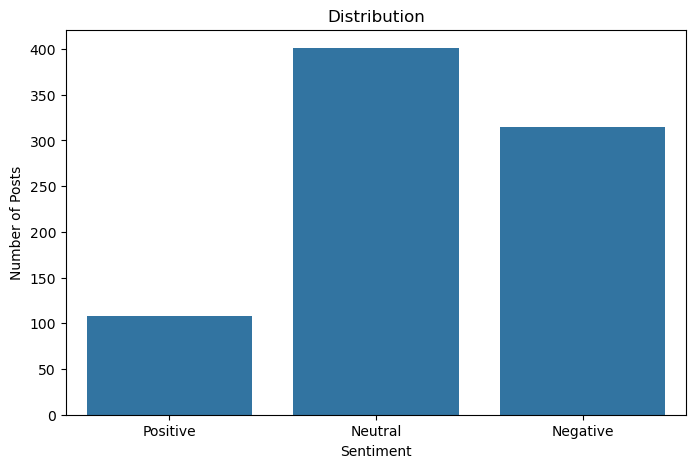

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_name', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

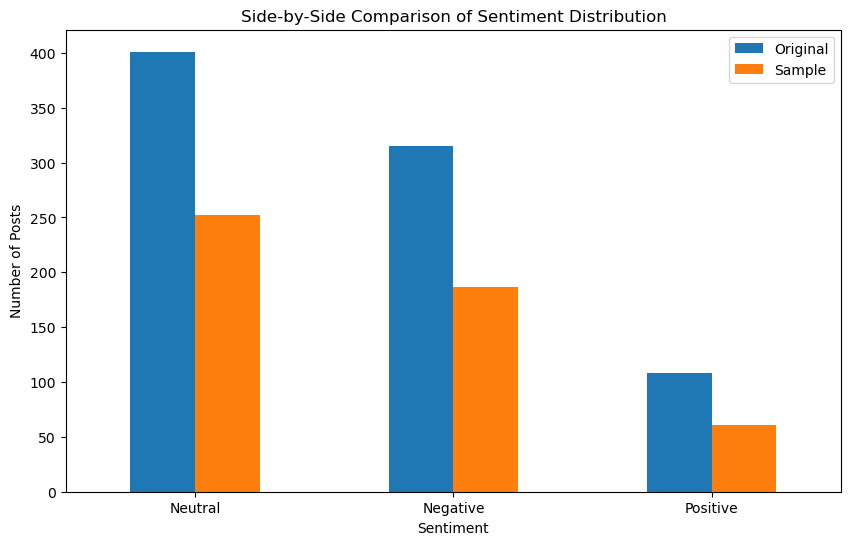

In [6]:
# create sample
df_sample = df.sample(n=500, random_state=1)

# get the counts of each
original_counts = df['sentiment_name'].value_counts().rename('Original')
sample_counts = df_sample['sentiment_name'].value_counts().rename('Sample')

comparison_df = pd.concat([original_counts, sample_counts], axis=1)

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Side-by-Side Comparison of Sentiment Distribution')
plt.ylabel('Number of Posts')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

In [7]:
# lets check for the changes between df and df_sample

# 1. The number of rows is different
print(f"Original df length: {len(df)}")
print(f"Sample df length: {len(df_sample)}")
print("\n")

# 2. The index is all mixed up now because it was a random sample
# the original index goes 0, 1, 2, 3...
# the sample index is random, like 413, 113, 277...
print("--- Original Index ---")
print(df.index[:5])
print("\n--- Sample Index ---")
print(df_sample.index[:5])
print("\n")

# 3. Because the index is random, the data is also in a random order
print("--- First 3 rows of Original df ---")
print(df['text'].head(3))
print("\n--- First 3 rows of Sample df ---")
print(df_sample['text'].head(3))

Original df length: 824
Sample df length: 500


--- Original Index ---
Index([0, 1, 2, 3, 4], dtype='int64')

--- Sample Index ---
Index([240, 512, 747, 275, 419], dtype='int64')


--- First 3 rows of Original df ---
0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
Name: text, dtype: object

--- First 3 rows of Sample df ---
240    Also China: We are embargoing strategic minera...
512      moving money quickly from us to his own pockets
747    Ask our SC how they feel about it: “Way to go ...
Name: text, dtype: object


### 5. Feature Creation: Tokenization and Document-Term Matrix
first we break it down into tokens then convert our text data into a document-term matrix

In [8]:
nltk.download('punkt')

df['unigrams'] = df['text'].apply(nltk.word_tokenize)

print("example:")
print(df[['text', 'unigrams']].head())

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


example:
                                                text  \
0                                   Calls on retards   
1  Stunt as in like why did they even make a big ...   
2                  Seeing lots of red in the ticker.   
3  Vision Marine Technologies Inc. is rewriting t...   
4                           He didn’t say thank you.   

                                            unigrams  
0                               [Calls, on, retards]  
1  [Stunt, as, in, like, why, did, they, even, ma...  
2        [Seeing, lots, of, red, in, the, ticker, .]  
3  [Vision, Marine, Technologies, Inc., is, rewri...  
4               [He, didn, ’, t, say, thank, you, .]  


In [9]:
# CountVectorizer to create a document-term matrix
# counts the occurrences of each word in each document
count_vect = CountVectorizer(
    stop_words='english',
    max_df=0.85,  # ignore words that show more than 85% of the docs
    min_df=3,     # word have to be in at least 3 docs
    token_pattern=r'\b[a-zA-Z]{3,}\b' # 3 letter or more words
)
X_counts = count_vect.fit_transform(df['text'])

print(f"Shape of the matrix: {X_counts.shape}")
print("(Documents, Unique Words)")

Shape of the matrix: (824, 825)
(Documents, Unique Words)


#### Visualizing the Matrix Sparsity
using heatmap to check how sparse the matrix is

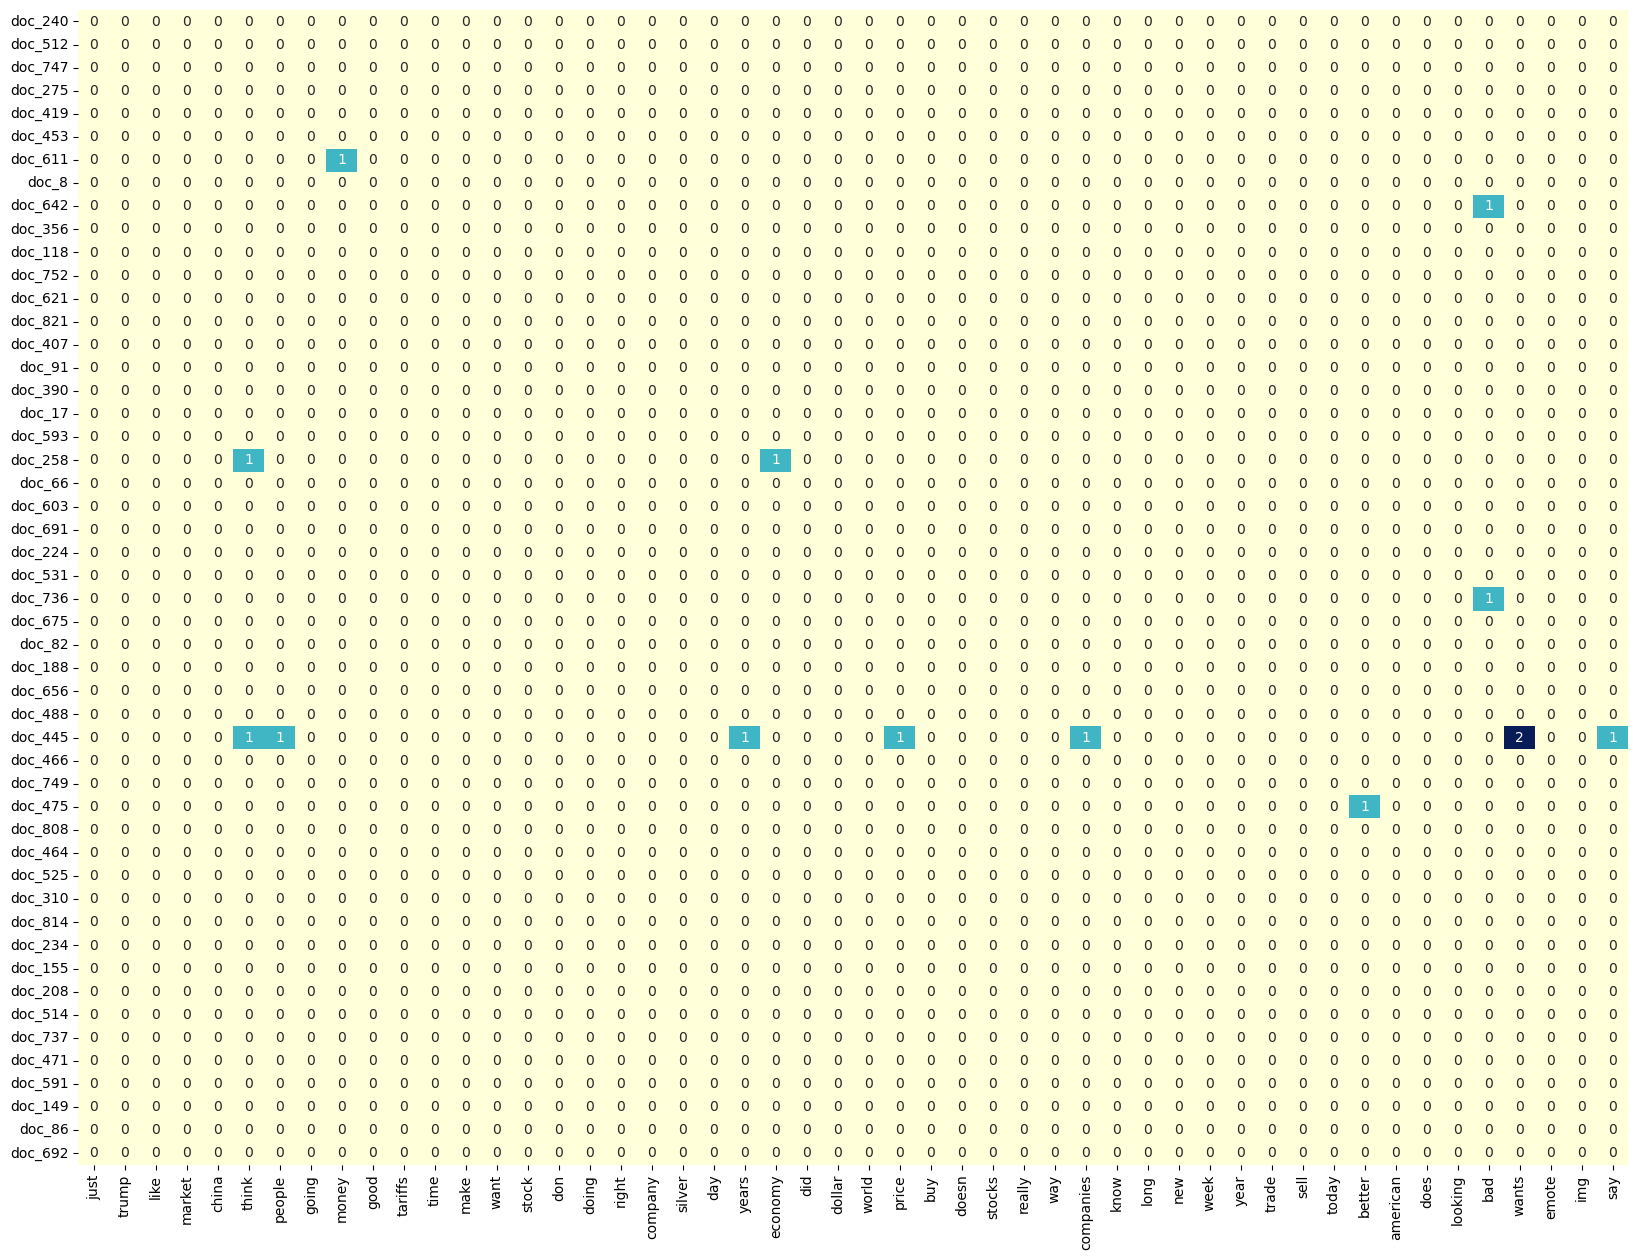

In [10]:
# frandom document to 50 top frequent terms
random_sample = df.sample(n=50, random_state=1)
sample_indices = random_sample.index
doc_names = [f"doc_{i}" for i in sample_indices]
top_term_indices = np.argsort(X_counts.sum(axis=0).A1)[::-1][:50]
heatmap_df = pd.DataFrame(
    X_counts[:50, :50].toarray(),
    index=doc_names,
    columns=count_vect.get_feature_names_out()[top_term_indices],
)
plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_df, cmap="YlGnBu", annot=True, cbar=False)
plt.show()

using spy plot, good for sparse matrix, use dark background for clearer view

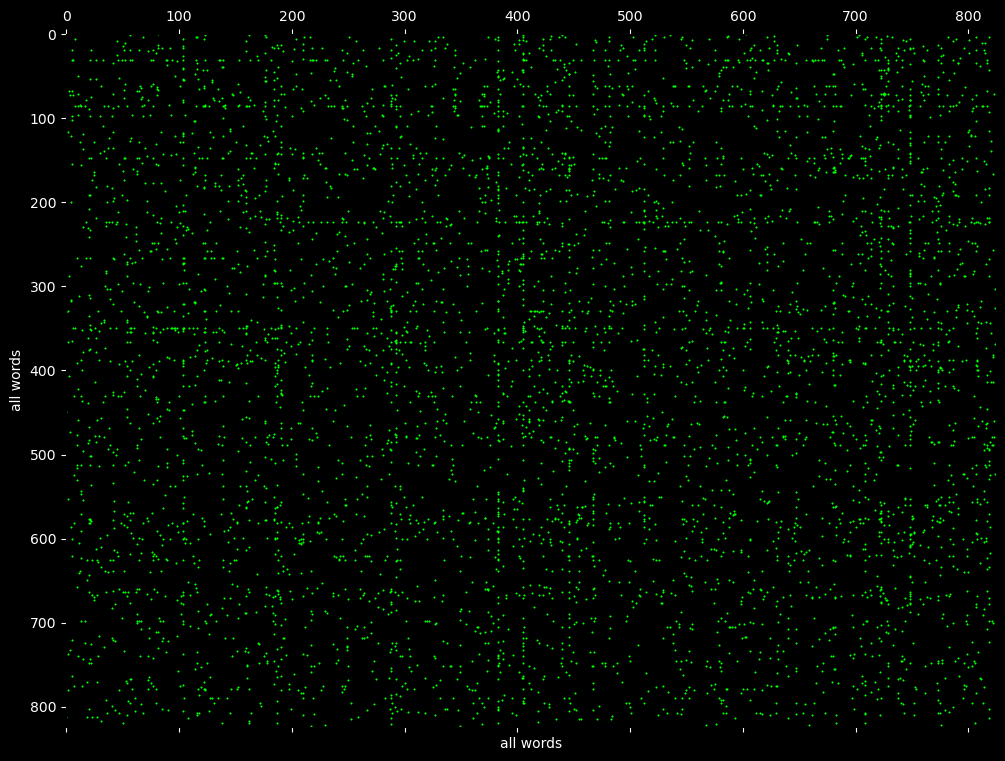

In [11]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.set_facecolor('black')
fig.set_facecolor('black')

ax.spy(X_counts, markersize=0.5, aspect='auto', color='lime')

ax.set_xlabel('all words', color='white')
ax.set_ylabel('all words', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()

In [12]:
print(pd.DataFrame({'Term': count_vect.get_feature_names_out(), 'Frequency': np.asarray(X_counts.sum(axis=0))[0]}).sort_values(by='Frequency', ascending=False).head(5).to_string(index=False))

  Term  Frequency
  just         95
 trump         92
  like         83
market         82
 china         72


### 6. Attribute Transformation: Term Frequencies

In [13]:
# To show how to get the second "1" based on Ex 10

doc_vector = X_counts[0].toarray()

indices_of_ones = np.where(doc_vector[0] == 1)[0]
print(f"{indices_of_ones}")

# first two indices
first_word_index = indices_of_ones[0]
second_word_index = indices_of_ones[1]

# Get the actual words from the vectorizer's vocabulary
word1 = count_vect.get_feature_names_out()[first_word_index]
word2 = count_vect.get_feature_names_out()[second_word_index]

print(f"The word at index {first_word_index} is: '{word1}'")
print(f"The word at index {second_word_index} is: '{word2}'")

[ 81 603]
The word at index 81 is: 'calls'
The word at index 603 is: 'retards'


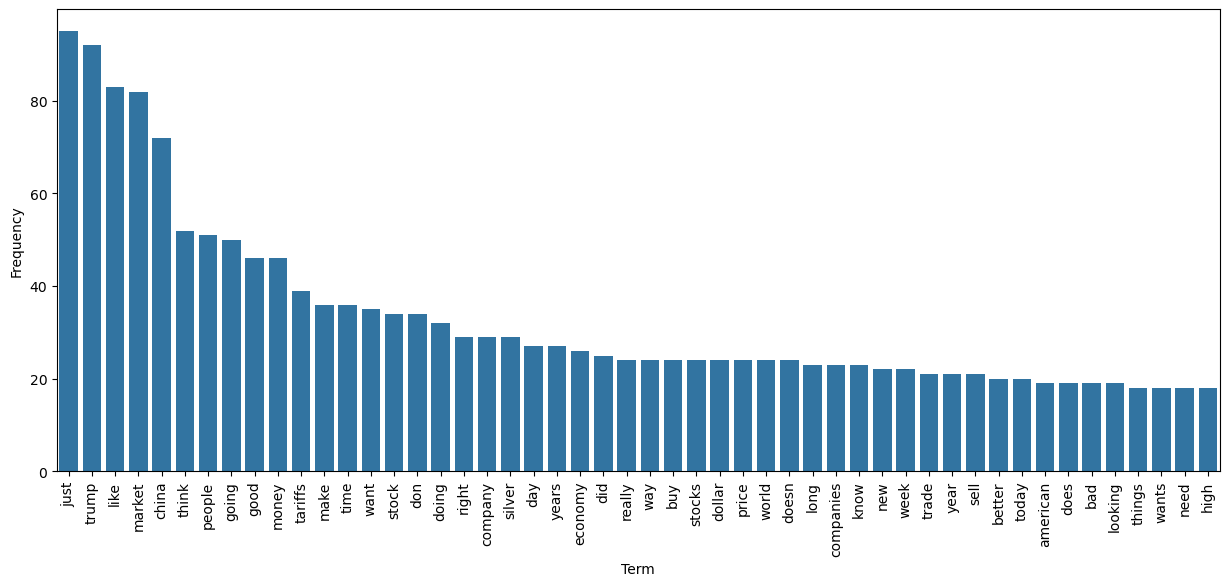

In [14]:
# sum words
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

term_freq_df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(), 
    'Frequency': term_frequencies
})

# sort by freq
term_freq_df_sorted = term_freq_df.sort_values(by='Frequency', ascending=False)

# top 50 most frequent
plt.figure(figsize=(15, 6))
sns.barplot(x='Term', y='Frequency', data=term_freq_df_sorted.head(50))
plt.xticks(rotation=90)
plt.show()

In [15]:
import plotly.express as px

fig = px.bar(term_freq_df_sorted.head(300), x="Term", y="Frequency")

fig.show()

#### Log Transformation
The frequency distribution is heavily skewed. Applying a log transformation helps to visualize the differences between less frequent words more clearly.

In [16]:
# Apply a log transformation to the frequency
# We add 1 to avoid taking the log of zero
term_freq_df_sorted['LogFrequency'] = term_freq_df_sorted['Frequency'].apply(lambda x: math.log(x + 1))

# Plot the log-transformed frequencies of the top 50 terms
fig = px.bar(term_freq_df_sorted.head(300), x="Term", y="LogFrequency")

fig.show()

---
End of Phase 1 process on the new dataset.

# Phase 2

In [17]:
### Begin Assignment Here